In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Step 1 : Load the data sets

Hint : make sure your path is proper. Inorder to reduce OS dependencies on the filepath use Path 

Explore https://pypi.org/project/path.py/ 

In [2]:
# loading dataset into a pandas data frame using read_csv available with pandas

df = pd.read_csv('Comcast_telecom_complaints_data.csv')

## Step 2 : Explore the data 

- Print the data frame
- Check the data types in the data frame
- Look at the head, and do a describe on the dataset

In [3]:
#viewing first 5 rows
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
#type of each column
df.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [5]:
#describing the DataFrame
df.describe

<bound method NDFrame.describe of      Ticket #                                 Customer Complaint      Date  \
0      250635                      Comcast Cable Internet Speeds  22-04-15   
1      223441       Payment disappear - service got disconnected  04-08-15   
2      242732                                  Speed and Service  18-04-15   
3      277946  Comcast Imposed a New Usage Cap of 300GB that ...  05-07-15   
4      307175         Comcast not working and no service to boot  26-05-15   
5      338519  ISP Charging for arbitrary data limits with ov...  06-12-15   
6      361148      Throttling service and unreasonable data caps  24-06-15   
7      359792  Comcast refuses to help troubleshoot and corre...  23-06-15   
8      318072                           Comcast extended outages  06-01-15   
9      371214  Comcast Raising Prices and Not Being Available...  28-06-15   
10     255938  Billing after service was asked to be disconne...  24-04-15   
11     276409      YAHOO FAILU

In [6]:
#type of DataFrame
type(df)

pandas.core.frame.DataFrame

### Task 1 : Provide a trend chart for the number of complaints at monthly and daily granularity levels

**Hints - Daily Granualrity**
- For this we need to plot date on x-axis and no of complaints on y-axis
- To plot explore plot method available with a dataframe
- Value_counts of data frame gives the frequency of occurence of a record
- Choose the date time coloum from the datat frame and find the number of occurences to identify the max number of complaints. 



In [7]:
#converting to datetime object
df.Date_month_year=pd.to_datetime(df.Date_month_year)

In [8]:
#grouping the columns
y = df.groupby('Date_month_year')['Customer Complaint'].count()
print(y.describe())
print(y.sort_values)

count     91.000000
mean      24.439560
std       30.249411
min        5.000000
25%       12.000000
50%       17.000000
75%       25.000000
max      218.000000
Name: Customer Complaint, dtype: float64
<bound method Series.sort_values of Date_month_year
2015-01-04     18
2015-01-05     12
2015-01-06     25
2015-02-04     27
2015-02-05      7
2015-02-06     25
2015-03-04     15
2015-03-05      5
2015-03-06     25
2015-04-04     12
2015-04-05     12
2015-04-06     12
2015-04-13     24
2015-04-14     23
2015-04-15     12
2015-04-16     20
2015-04-17     21
2015-04-18      8
2015-04-19      9
2015-04-20     20
2015-04-21     12
2015-04-22     22
2015-04-23     23
2015-04-24     24
2015-04-25     16
2015-04-26      8
2015-04-27     25
2015-04-28     26
2015-04-29     22
2015-04-30     24
             ... 
2015-06-19     29
2015-06-20     16
2015-06-21     12
2015-06-22     30
2015-06-23    190
2015-06-24    218
2015-06-25     98
2015-06-26     55
2015-06-27     39
2015-06-28     27
2015-06-2

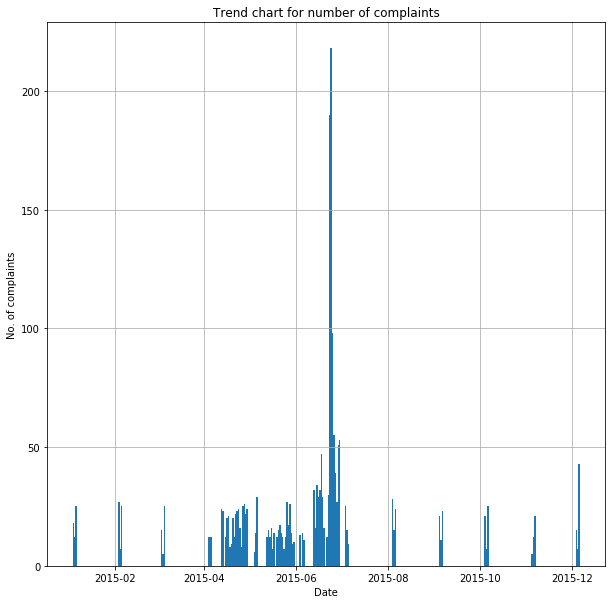

In [9]:
#plotting the daily complaints
plt.figure(figsize=(10,10))
hist = df['Date_month_year'].hist(bins = 356)
plt.title('Trend chart for number of complaints')
plt.xlabel("Date")
plt.ylabel("No. of complaints")
plt.show()

**Hint - Monthly Granualrity** 

- In order to get monthly granualarity you need to parse the date time object 
- Use DatetimeIndex available with pandas https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html

- Apply DatetimeIndex on the colum having Date information 
- After you get the indexes of month and year from the data frame combine year and month colums after converting them as strings.
- so you should get a something like 2015_4 for each row, then find the frequency by using value_counts()

- this approach will help even if there are complaints form multiple years, if you find this difficult just get value counts by month as our data is only pertaining to a single year here. 

In [10]:
#sorting via DateTime
df.Date_month_year=pd.DatetimeIndex(df.Date_month_year).sort_values()

In [11]:
df.Date_month_year

0      2015-01-04
1      2015-01-04
2      2015-01-04
3      2015-01-04
4      2015-01-04
5      2015-01-04
6      2015-01-04
7      2015-01-04
8      2015-01-04
9      2015-01-04
10     2015-01-04
11     2015-01-04
12     2015-01-04
13     2015-01-04
14     2015-01-04
15     2015-01-04
16     2015-01-04
17     2015-01-04
18     2015-01-05
19     2015-01-05
20     2015-01-05
21     2015-01-05
22     2015-01-05
23     2015-01-05
24     2015-01-05
25     2015-01-05
26     2015-01-05
27     2015-01-05
28     2015-01-05
29     2015-01-05
          ...    
2194   2015-12-06
2195   2015-12-06
2196   2015-12-06
2197   2015-12-06
2198   2015-12-06
2199   2015-12-06
2200   2015-12-06
2201   2015-12-06
2202   2015-12-06
2203   2015-12-06
2204   2015-12-06
2205   2015-12-06
2206   2015-12-06
2207   2015-12-06
2208   2015-12-06
2209   2015-12-06
2210   2015-12-06
2211   2015-12-06
2212   2015-12-06
2213   2015-12-06
2214   2015-12-06
2215   2015-12-06
2216   2015-12-06
2217   2015-12-06
2218   201

In [12]:
#creating new columns
df['year'] = pd.DatetimeIndex(df['Date_month_year']).year
df['month'] = pd.DatetimeIndex(df['Date_month_year']).month

In [13]:
#typecasting
df.year = df.year.astype(str)
df.month = df.month.astype(str)

In [14]:
#concatenation
df["year_month"] = df["year"] + '-' + df["month"]

In [15]:
df['year_month']

0        2015-1
1        2015-1
2        2015-1
3        2015-1
4        2015-1
5        2015-1
6        2015-1
7        2015-1
8        2015-1
9        2015-1
10       2015-1
11       2015-1
12       2015-1
13       2015-1
14       2015-1
15       2015-1
16       2015-1
17       2015-1
18       2015-1
19       2015-1
20       2015-1
21       2015-1
22       2015-1
23       2015-1
24       2015-1
25       2015-1
26       2015-1
27       2015-1
28       2015-1
29       2015-1
         ...   
2194    2015-12
2195    2015-12
2196    2015-12
2197    2015-12
2198    2015-12
2199    2015-12
2200    2015-12
2201    2015-12
2202    2015-12
2203    2015-12
2204    2015-12
2205    2015-12
2206    2015-12
2207    2015-12
2208    2015-12
2209    2015-12
2210    2015-12
2211    2015-12
2212    2015-12
2213    2015-12
2214    2015-12
2215    2015-12
2216    2015-12
2217    2015-12
2218    2015-12
2219    2015-12
2220    2015-12
2221    2015-12
2222    2015-12
2223    2015-12
Name: year_month, Length

In [16]:
df['year_month'].value_counts()

2015-6     1046
2015-4      375
2015-5      317
2015-8       67
2015-12      65
2015-2       59
2015-9       55
2015-1       55
2015-10      53
2015-7       49
2015-3       45
2015-11      38
Name: year_month, dtype: int64

In [17]:
df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
year                                   object
month                                  object
year_month                             object
dtype: object

In [18]:
type(df.year_month)

pandas.core.series.Series

In [19]:
df.year_month = pd.to_datetime(df.year_month)

In [20]:
#grouping
monthly_count = df.groupby(df['year_month'])['Customer Complaint'].count()

In [21]:
monthly_count.describe

<bound method NDFrame.describe of year_month
2015-01-01      55
2015-02-01      59
2015-03-01      45
2015-04-01     375
2015-05-01     317
2015-06-01    1046
2015-07-01      49
2015-08-01      67
2015-09-01      55
2015-10-01      53
2015-11-01      38
2015-12-01      65
Name: Customer Complaint, dtype: int64>

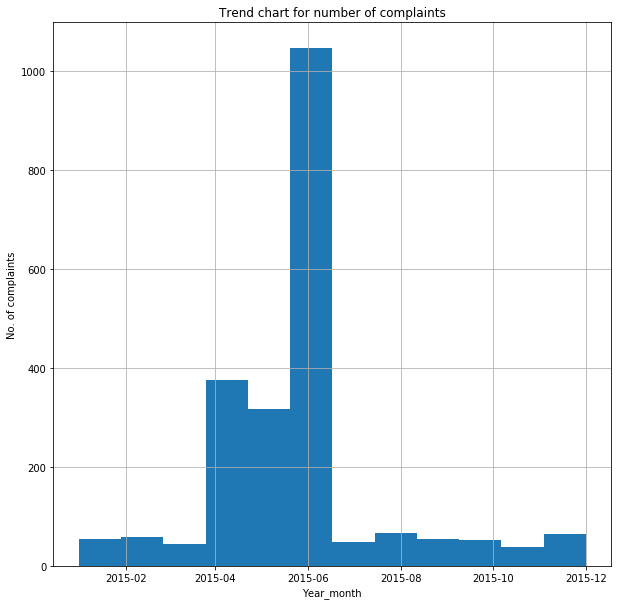

In [22]:
#plotting on monthly complaints
plt.figure(figsize=(10,10))
hist = df['year_month'].hist(bins = 12)
plt.title('Trend chart for number of complaints')
plt.xlabel("Year_month")
plt.ylabel("No. of complaints")
plt.show()

### Task 2 : Find out which complaints are maximum

**Hints**

- Need to use NLP library for finding this out. 
- Use CountVectorizer to tokenize the text. 
- Need to play with the parameter ngram_range , as we need to extract meaningful word sequences instead of just frequent words
- N-gram is simply a sequence of N words.

In [23]:
#import nltk for NLP
import nltk

In [24]:
#import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
text = df['Customer Complaint']

In [26]:
type(text)

pandas.core.series.Series

In [27]:
text

0                           Comcast Cable Internet Speeds
1            Payment disappear - service got disconnected
2                                       Speed and Service
3       Comcast Imposed a New Usage Cap of 300GB that ...
4              Comcast not working and no service to boot
5       ISP Charging for arbitrary data limits with ov...
6           Throttling service and unreasonable data caps
7       Comcast refuses to help troubleshoot and corre...
8                                Comcast extended outages
9       Comcast Raising Prices and Not Being Available...
10      Billing after service was asked to be disconne...
11          YAHOO FAILURE TO RESTORE EMAIL SEARCH FEATURE
12      Comcast Violating Open Internet Rules by Block...
13                                         Internet speed
14                       Internet Disconnects Every Night
15                                     Internet complaint
16                        Internet Availability and Speed
17      Comcas

In [28]:
#initializing the CountVectorizer object
vectorizer = CountVectorizer(ngram_range=(2,6))
type(vectorizer)
print(vectorizer)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 6), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [29]:
#fitting the CountVectorizer object
bag_of_words = vectorizer.fit(text)

In [30]:
#building the analyzer
analyzer = vectorizer.build_analyzer()

In [31]:
type(analyzer)

function

In [32]:
#getting the feature names
features = vectorizer.get_feature_names()
features

['10 50gb',
 '10 at',
 '10 at best',
 '10 calls',
 '10 calls and',
 '10 calls and spending',
 '10 calls and spending 10',
 '10 calls and spending 10 hours',
 '10 days',
 '10 days cannot',
 '10 days cannot make',
 '10 days cannot make 911',
 '10 days cannot make 911 calls',
 '10 days no',
 '10 days no service',
 '10 days no service 12',
 '10 days no service 12 appointments',
 '10 hours',
 '10 hours with',
 '10 hours with comcast',
 '10 hours with comcast on',
 '10 hours with comcast on phone',
 '10 months',
 '10 months straight',
 '10 of',
 '10 of what',
 '10 of what is',
 '10 of what is promised',
 '10 of what is promised to',
 '10 years',
 '10 years of',
 '10 years of service',
 '100 deposit',
 '100 deposit to',
 '100 deposit to open',
 '100 deposit to open an',
 '100 deposit to open an account',
 '1000ms latency',
 '1000ms latency under',
 '1000ms latency under 1mbps',
 '1000ms latency under 1mbps speeds',
 '105 mb',
 '105 mb and',
 '105 mb and they',
 '105 mb and they wont',
 '105 m

In [33]:
type(features)

list

In [34]:
len(features)

18376

In [35]:
type(bag_of_words)

sklearn.feature_extraction.text.CountVectorizer

In [36]:
bag_of_words

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(2, 6), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [37]:
#transforming the CountVectorizer object
bag_of_words = vectorizer.transform(text)

In [38]:
type(bag_of_words)

scipy.sparse.csr.csr_matrix

In [39]:
print(bag_of_words)

  (0, 2593)	1
  (0, 2596)	1
  (0, 3633)	1
  (0, 3646)	1
  (0, 3647)	1
  (0, 9626)	1
  (1, 6501)	1
  (1, 6502)	1
  (1, 6503)	1
  (1, 8192)	1
  (1, 12809)	1
  (1, 12810)	1
  (1, 12811)	1
  (1, 12812)	1
  (1, 14624)	1
  (1, 14625)	1
  (2, 1149)	1
  (2, 15291)	1
  (2, 15306)	1
  (3, 163)	1
  (3, 164)	1
  (3, 165)	1
  (3, 2796)	1
  (3, 2797)	1
  (3, 2798)	1
  :	:
  (2220, 7727)	1
  (2220, 10977)	1
  (2220, 10978)	1
  (2220, 10979)	1
  (2220, 10980)	1
  (2220, 14163)	1
  (2221, 254)	1
  (2221, 5464)	1
  (2221, 5465)	1
  (2222, 3796)	1
  (2222, 7085)	1
  (2222, 7086)	1
  (2222, 7087)	1
  (2222, 17307)	1
  (2222, 17308)	1
  (2223, 5409)	1
  (2223, 5410)	1
  (2223, 5411)	1
  (2223, 5412)	1
  (2223, 9573)	1
  (2223, 10748)	1
  (2223, 10749)	1
  (2223, 18373)	1
  (2223, 18374)	1
  (2223, 18375)	1


In [40]:
bag_of_words.shape

(2224, 18376)

In [41]:
bag_of_words[0]

<1x18376 sparse matrix of type '<class 'numpy.int64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [42]:
bag_of_words[0].size

6

In [43]:
type(vectorizer.vocabulary_)

dict

In [44]:
print(vectorizer.vocabulary_)

{'comcast cable': 3633, 'cable internet': 2593, 'internet speeds': 9626, 'comcast cable internet': 3646, 'cable internet speeds': 2596, 'comcast cable internet speeds': 3647, 'payment disappear': 12809, 'disappear service': 6501, 'service got': 14624, 'got disconnected': 8192, 'payment disappear service': 12810, 'disappear service got': 6502, 'service got disconnected': 14625, 'payment disappear service got': 12811, 'disappear service got disconnected': 6503, 'payment disappear service got disconnected': 12812, 'speed and': 15291, 'and service': 1149, 'speed and service': 15306, 'comcast imposed': 4227, 'imposed new': 8661, 'new usage': 11379, 'usage cap': 17404, 'cap of': 2796, 'of 300gb': 11862, '300gb that': 163, 'that punishes': 15946, 'punishes streaming': 13517, 'comcast imposed new': 4228, 'imposed new usage': 8662, 'new usage cap': 11380, 'usage cap of': 17407, 'cap of 300gb': 2797, 'of 300gb that': 11863, '300gb that punishes': 164, 'that punishes streaming': 15947, 'comcast i

In [45]:
len(vectorizer.vocabulary_)

18376

In [46]:
#function to get the frequency of the words
def get_top_n_words(corpus, n=None , ngram_len=6):    
    vec = CountVectorizer(ngram_range=(3,ngram_len)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [47]:
get_top_n_words(text)

[('comcast data cap', 43),
 ('comcast data caps', 28),
 ('unfair billing practices', 25),
 ('comcast internet service', 21),
 ('comcast data usage', 18),
 ('bait and switch', 17),
 ('service from comcast', 14),
 ('comcast customer service', 13),
 ('poor customer service', 13),
 ('comcast refuses to', 12),
 ('complaint against comcast', 11),
 ('service and billing', 11),
 ('comcast billing and', 10),
 ('high speed internet', 10),
 ('and customer service', 9),
 ('hbo go on', 9),
 ('issues with comcast', 9),
 ('data usage cap', 9),
 ('comcast unfair billing', 9),
 ('customer service and', 9),
 ('blocking hbo go', 8),
 ('billing and service', 8),
 ('comcast billing practices', 8),
 ('comcast service and', 8),
 ('comcast will not', 7),
 ('slow internet speeds', 7),
 ('comcast xfinity internet', 7),
 ('internet data cap', 6),
 ('throttling my internet', 6),
 ('of internet service', 6),
 ('lack of service', 6),
 ('comcast throttling my', 6),
 ('no internet service', 6),
 ('comcast business in

### Task 4 Create a new catergorical variable 

- 4 status to be merged in to two open (Open & Pending) and closed (Solved & Closed).
- create a new coloum in the original dataframe.
- Use a loop to iterate through the existing status colum and add entries to the new colum.
- Use list comprehension instread of a for loop.

In [48]:
type(df['Status'])

pandas.core.series.Series

In [49]:
#merging the status in a new column where (Open and Pending) = 1 and (Closed and Solved) = 0
# Create a variable
status_new = []

# For each row in df.Status,
for row in df['Status']:
    
    if(row == 'Open'):
        status_new.append(1)
    elif(row == 'Pending'):
        status_new.append(1)
    elif(row == 'Closed'):
        status_new.append(0)
    elif(row == 'Solved'):
        status_new.append(0)
    else:
        status_new.append(0)

status_new
# Create df.Status_new
df['Status_new'] = status_new

# View the dataframe
df

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,year,month,year_month,Status_new
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-01-04,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015,1,2015-01-01,0
1,223441,Payment disappear - service got disconnected,04-08-15,2015-01-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015,1,2015-01-01,0
2,242732,Speed and Service,18-04-15,2015-01-04,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015,1,2015-01-01,0
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-01-04,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015,1,2015-01-01,1
4,307175,Comcast not working and no service to boot,26-05-15,2015-01-04,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015,1,2015-01-01,0
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,2015-01-04,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No,2015,1,2015-01-01,0
6,361148,Throttling service and unreasonable data caps,24-06-15,2015-01-04,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,2015,1,2015-01-01,1
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,2015-01-04,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No,2015,1,2015-01-01,0
8,318072,Comcast extended outages,06-01-15,2015-01-04,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No,2015,1,2015-01-01,0
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-01-04,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,2015,1,2015-01-01,1


In [50]:
type(df['Status_new'])

pandas.core.series.Series

### Task 5 : Which state has max complaints. 

- Use groupby available with the data frame

In [51]:
#grouping with state count
max_complaint_state = df.groupby(df['State'])['Customer Complaint'].count()

In [52]:
max_complaint_state.sort_values(ascending=False)

State
Georgia                 288
Florida                 240
California              220
Illinois                164
Tennessee               143
Pennsylvania            130
Michigan                115
Washington               98
Colorado                 80
Maryland                 78
New Jersey               75
Texas                    71
Massachusetts            61
Virginia                 60
Indiana                  59
Oregon                   49
Mississippi              39
Minnesota                33
Alabama                  26
Utah                     22
Arizona                  20
South Carolina           18
District Of Columbia     16
New Mexico               15
Louisiana                13
New Hampshire            12
Connecticut              12
Delaware                 12
West Virginia            11
Kentucky                  7
New York                  6
Arkansas                  6
Maine                     5
Missouri                  4
North Carolina            3
Vermont       

### Task 6 : which state has highest percentage of un resolved complaints

- Use groupby with two coloums

In [53]:
#creating new DataFrame with only Open and Pending complaints
df1 = df[df['Status_new'] > 0]
df1

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,year,month,year_month,Status_new
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-01-04,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015,1,2015-01-01,1
6,361148,Throttling service and unreasonable data caps,24-06-15,2015-01-04,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No,2015,1,2015-01-01,1
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,2015-01-04,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes,2015,1,2015-01-01,1
12,339282,Comcast Violating Open Internet Rules by Block...,13-06-15,2015-01-04,4:03:18 PM,Internet,Albuquerque,New Mexico,87105,Open,Yes,2015,1,2015-01-01,1
15,370137,Internet complaint,27-06-15,2015-01-04,3:25:03 PM,Customer Care Call,Albuquerqur,New Mexico,87102,Pending,No,2015,1,2015-01-01,1
23,370538,Comcast monopoly bundling practices,27-06-15,2015-01-05,9:04:34 PM,Internet,Alexandria,Virginia,22304,Open,No,2015,1,2015-01-01,1
25,270163,bait and switch,05-02-15,2015-01-05,3:55:24 PM,Internet,Algonquin,Illinois,60102,Open,Yes,2015,1,2015-01-01,1
26,355976,Comcast Customer Service,22-06-15,2015-01-05,2:10:39 PM,Internet,Aliquippa,Pennsylvania,15001,Open,No,2015,1,2015-01-01,1
29,360759,Wifi internet not working as well,24-06-15,2015-01-05,2:23:23 AM,Internet,Aloha,Oregon,97006,Pending,No,2015,1,2015-01-01,1
38,300824,"INTERNET , BILLING AND SERVIE ISSUES",21-05-15,2015-01-06,9:34:19 AM,Customer Care Call,Ambridge,Pennsylvania,15003,Open,No,2015,1,2015-01-01,1


In [54]:
#grouping with open compaints
max_unresolved_complaint_state = df1.groupby(df1['State'])['Status_new'].count()

In [55]:
max_unresolved_complaint_state.sort_values(ascending=False)

State
Georgia                 80
California              61
Tennessee               47
Florida                 39
Illinois                29
Michigan                23
Washington              23
Colorado                22
Texas                   22
Pennsylvania            20
New Jersey              19
Mississippi             16
Maryland                15
Oregon                  13
Virginia                11
Massachusetts           11
Indiana                  9
Alabama                  9
Utah                     6
Arizona                  6
Minnesota                4
New Hampshire            4
New Mexico               4
Delaware                 4
Kentucky                 3
South Carolina           3
Connecticut              3
West Virginia            3
Maine                    2
District Of Columbia     2
Louisiana                1
Kansas                   1
Missouri                 1
Vermont                  1
Name: Status_new, dtype: int64

### Task 7 : % of complaints resolved till date

- Groupby status we added, and use size() to see the count of each.
- Findi total complaints and do the %

In [56]:
#size of all complaints
df.size

33360

In [57]:
#size of open complaints
df1.size

7755

In [58]:
#total complaints resolved
resolved_complaints = (df.size) - (df1.size)
resolved_complaints

25605

In [60]:
#percentage of complaints resolved
percentage_complaint_resolved = ((resolved_complaints)/(df.size))*100
percentage_complaint_resolved

76.753597122302153